In [ ]:
#Data Source https://www.kaggle.com/nowke9/ipldata

In [ ]:
# if we need to install plotly and cufflinks just uncomment below command and run it 
#!pip install plotly
#!pip install cufflinks

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import cufflinks as cf
%matplotlib inline

In [2]:
# runnig ploty offline 
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [11]:
# read data 
# there is column which is id we will make it our index and parse match date
df = pd.read_csv('matches.csv')
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [13]:
# there is column which is id we will make it our index and parse match date
# and we will parse date to date time as it's an object
df = pd.read_csv('matches.csv', index_col='id', parse_dates=['date'])
df.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 1 to 11415
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   season           756 non-null    int64         
 1   city             749 non-null    object        
 2   date             756 non-null    datetime64[ns]
 3   team1            756 non-null    object        
 4   team2            756 non-null    object        
 5   toss_winner      756 non-null    object        
 6   toss_decision    756 non-null    object        
 7   result           756 non-null    object        
 8   dl_applied       756 non-null    int64         
 9   winner           752 non-null    object        
 10  win_by_runs      756 non-null    int64         
 11  win_by_wickets   756 non-null    int64         
 12  player_of_match  752 non-null    object        
 13  venue            756 non-null    object        
 14  umpire1          754 non-null    object 

In [18]:
# what about checking matches results 
# noramal ---> there is winner and looser 
# tie --> equallity and need extra play
# no result cancelled due to some reason like rains
df['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [20]:
df [df['result']=='no result'] # we can do it also for noraml and tie

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
11340,2019,Bengaluru,2019-04-30,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [23]:
# as we can see when result eaual 'no result' the winner is NaN
# we can check it we will get 4 values when natch has no result 
df['winner'].isnull().sum()

4

In [26]:
# lets play with our data 
winners_and_loosers=df[['team1', 'team2','winner']]
winners_and_loosers

,team1,team2,winner
id,,,
1,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad
2,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant
3,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders
4,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab
5,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore
...,...,...,...
11347,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians
11412,Chennai Super Kings,Mumbai Indians,Mumbai Indians
11413,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals


In [27]:
# what if we need to add looser column 
winners_and_loosers['looser']=1

In [28]:
winners_and_loosers.head()

,team1,team2,winner,looser
id,,,,
1,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,1
2,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,1
3,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,1
4,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,1
5,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,1


In [31]:
# we added column looser with value 1
# but we need to add actuall looser if team 1 is winner so team 2 is the looser and vice versa
# letfirstly drop looser column
winners_and_loosers.drop('looser', axis=1)

,team1,team2,winner
id,,,
1,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad
2,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant
3,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders
4,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab
5,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore
...,...,...,...
11347,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians
11412,Chennai Super Kings,Mumbai Indians,Mumbai Indians
11413,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals


In [35]:
winners_and_loosers['looser']=winners_and_loosers.apply(lambda x:(x['team2'] if x['winner']==x['team1'] else x['team1']), axis=1)

In [37]:
winners_and_loosers.head()

,team1,team2,winner,looser
id,,,,
1,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore
2,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,Mumbai Indians
3,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,Gujarat Lions
4,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,Rising Pune Supergiant
5,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,Delhi Daredevils


In [41]:
winners = winners_and_loosers['winner'].value_counts()
loosers = winners_and_loosers['looser'].value_counts()

In [46]:
# visualizing using plotly
winners.iplot(kind='bar', xTitle='Teams',yTitle='Times',title='Winner Teams counts') 
# we can do the same for  loosers :)

# Man Of The match 

In [49]:
# as per our data there is a man of the match for every match 
# so who the player with the hights number as a man of the match 
df['player_of_match']

id
1        Yuvraj Singh
2           SPD Smith
3             CA Lynn
4          GJ Maxwell
5           KM Jadhav
             ...     
11347       HH Pandya
11412        AS Yadav
11413         RR Pant
11414    F du Plessis
11415       JJ Bumrah
Name: player_of_match, Length: 756, dtype: object

In [50]:
# yes he is  CH Gayle 
df['player_of_match'].value_counts()

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
RG Sharma         17
DA Warner         17
                  ..
A Chandila         1
AD Mascarenhas     1
SB Wagh            1
LR Shukla          1
CL White           1
Name: player_of_match, Length: 226, dtype: int64

In [52]:
# what about plotting the highst ten plyaers win man of the match 
top_ten_players=df['player_of_match'].value_counts()[:10]
top_ten_players

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
RG Sharma         17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
V Kohli           12
Name: player_of_match, dtype: int64

In [55]:
top_ten_players.iplot(kind='bar',xTitle='Player',yTitle='Count', title='Top 10 Players')

In [ ]:
# what if we need to get results of matches between specfic two teams 
# we can solve this by the following function 

In [78]:
def count_matches(team1, team2):
    # making boolean series for a team name
    df_played_matches=df.loc[(df['team1'] == team1) & (df['team2'] ==team2) | (df['team1'] == team2) & (df['team2'] ==team1) ]
    return df_played_matches
    

In [85]:
two_teams_results=count_matches('Chennai Super Kings', 'Mumbai Indians')
two_teams_results.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
96,2008,Mumbai,2008-05-14,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,ST Jayasuriya,Wankhede Stadium,BR Doctrove,AM Saheba,NaN
118,2009,Cape Town,2009-04-18,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,19,0,SR Tendulkar,Newlands,BR Doctrove,K Hariharan,NaN
162,2009,Port Elizabeth,2009-05-16,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,ML Hayden,St George's Park,SK Tarapore,SJA Taufel,NaN
194,2010,Mumbai,2010-03-25,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,SR Tendulkar,Brabourne Stadium,BF Bowden,AM Saheba,NaN


In [86]:
two_teams_results.describe() # there is 28 matches between these two teams

,season,dl_applied,win_by_runs,win_by_wickets
count,28.000000,28.0,28.000000,28.000000
mean,2013.464286,0.0,14.535714,2.714286
std,3.458560,0.0,18.613978,3.353905
min,2008.000000,0.0,0.000000,0.000000
25%,2010.750000,0.0,0.000000,0.000000
50%,2013.000000,0.0,3.500000,0.000000
75%,2015.000000,0.0,24.250000,6.000000
max,2019.000000,0.0,60.000000,9.000000


In [87]:
two_teams_results['result'].value_counts() # all matches ends with a winner and looser

normal    28
Name: result, dtype: int64

In [88]:
# so who wins more ?
two_teams_results['winner'].value_counts()

Mumbai Indians         17
Chennai Super Kings    11
Name: winner, dtype: int64

In [91]:
# yes Mumbai Indians  wins 17 matches of 28 matches 
# let's try to plot it 
two_teams_results['winner'].value_counts().iplot(kind='bar',xTitle='teams',yTitle='Count', title='Mumbai Vs Chennai ')

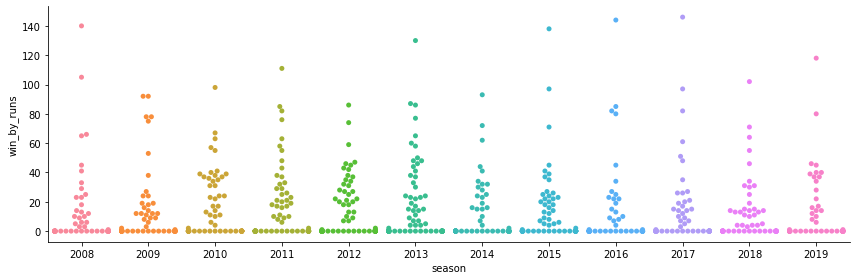

In [97]:
# lets play with season 
# zero value means win by wiscket
# other wins by runs
sns.catplot(x = 'season', y = 'win_by_runs', data = df, kind = 'swarm', height=4, aspect=3)

In [104]:
count_win_by_run=df.groupby('season')['win_by_runs'].count() # number of matches team wins by runs

In [105]:
count_win_by_run

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
Name: win_by_runs, dtype: int64

In [110]:
count_win_by_run.iplot(kind='bar', xTitle='Season', yTitle='count', title='Count of Matches Ends By Runs Per Seasons')

In [108]:
max_win_by_run=df.groupby('season')['win_by_runs'].max()

In [111]:
max_win_by_run.iplot(kind='bar', xTitle='Season', yTitle='count', title='Max Matches Ends By Runs Per Seasons')

In [116]:
# that is all thanks 